In [444]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
import seaborn as sns

In [445]:
data = pd.read_csv('LogisticRegression_Diabetes.csv' )
df = pd.DataFrame(data)
first_df = pd.DataFrame(data)

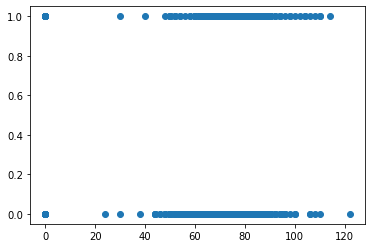

In [446]:
blood1 = df['BloodPressure'].to_numpy()
out  = df['Outcome'].to_numpy()
plt.scatter(blood1 , out)

In [447]:

y_data    = df.Outcome[df.Outcome == 1 ].index.tolist()
n_data    = df.Outcome[df.Outcome == 0 ].index.tolist()

y_BloodPressure  = [df['BloodPressure'][i] for i in y_data]
n_BloodPressure  = [df['BloodPressure'][i] for i in n_data]
y_SkinThickness  = [df['SkinThickness'][i] for i in y_data]
n_SkinThickness  = [df['SkinThickness'][i] for i in n_data]

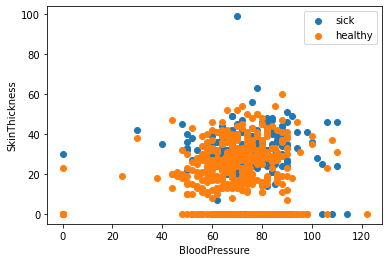

In [448]:
passed = plt.scatter(y_BloodPressure  , y_SkinThickness)
failed = plt.scatter(n_BloodPressure  , n_SkinThickness)
plt.xlabel('BloodPressure')
plt.ylabel('SkinThickness')
plt.legend((passed, failed), ('sick', 'healthy'))
plt.show()

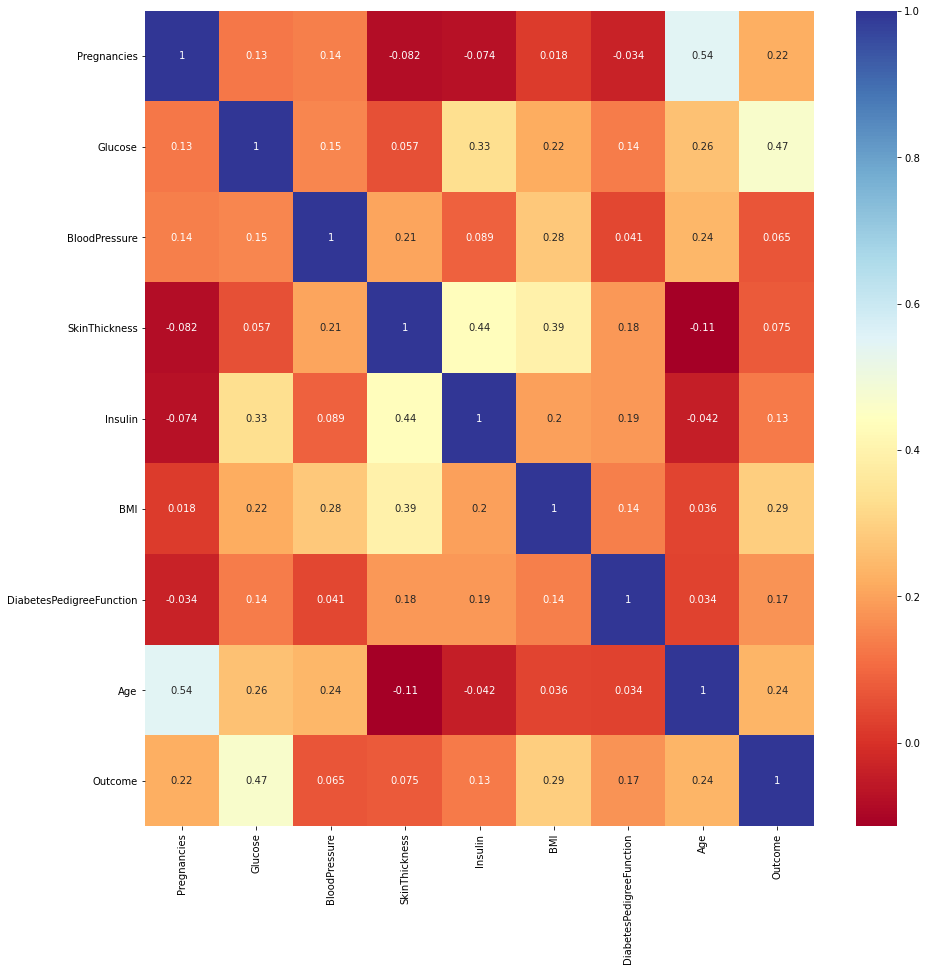

In [449]:
first_df = (first_df-first_df.min())/(first_df.max()-first_df.min())
plt.figure(figsize = (15,15))
sns.heatmap(first_df.corr(), annot = True ,cmap = 'RdYlBu')
plt.show()

In [450]:
'''
df = pd.DataFrame(X  , columns = ['Column_A','Column_B','Column_C' , 'd ' , 'e' , 'f'])
df
'''

"\ndf = pd.DataFrame(X  , columns = ['Column_A','Column_B','Column_C' , 'd ' , 'e' , 'f'])\ndf\n"

In [451]:
df = df.drop(['BloodPressure' , 'SkinThickness' ,'Insulin' ,  'DiabetesPedigreeFunction'] , axis = 1 )
df

,Pregnancies,Glucose,BMI,Age,Outcome
0,6,148,33.6,50,1
1,1,85,26.6,31,0
2,8,183,23.3,32,1
3,1,89,28.1,21,0
4,0,137,43.1,33,1
...,...,...,...,...,...
763,10,101,32.9,63,0
764,2,122,36.8,27,0
765,5,121,26.2,30,0
766,1,126,30.1,47,1


In [452]:
X = data.iloc[:,:-1]

def feature_maping(X1, X2):
    degree = 2
    out = np.ones(X.shape[0])[:,np.newaxis]
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j),np.power(X2, j))[:,np.newaxis]))
    return out
new_feature = feature_maping(X.iloc[:,1], X.iloc[:,2])
df_new = pd.DataFrame(new_feature  , columns = ['1','Glucose','BMI' , 'Glucose^2 ' , 'Glucose * BMI' , 'BMI^2'])
df_new = df_new.drop(['Glucose' , '1' , 'BMI'] , axis = 1 ) 
df_new

<ipython-input-452-97483d3e8eed>:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out = np.hstack((out, np.multiply(np.power(X1, i-j),np.power(X2, j))[:,np.newaxis]))


,Glucose^2,Glucose * BMI,BMI^2
0,21904.0,10656.0,5184.0
1,7225.0,5610.0,4356.0
2,33489.0,11712.0,4096.0
3,7921.0,5874.0,4356.0
4,18769.0,5480.0,1600.0
...,...,...,...
763,10201.0,7676.0,5776.0
764,14884.0,8540.0,4900.0
765,14641.0,8712.0,5184.0
766,15876.0,7560.0,3600.0


In [453]:
for col in df_new.columns:
    df.insert(len(df.columns) - 1 , col  , df_new[col] , True)
    
    

In [454]:
df = df.drop("BMI^2" , axis = 1 )

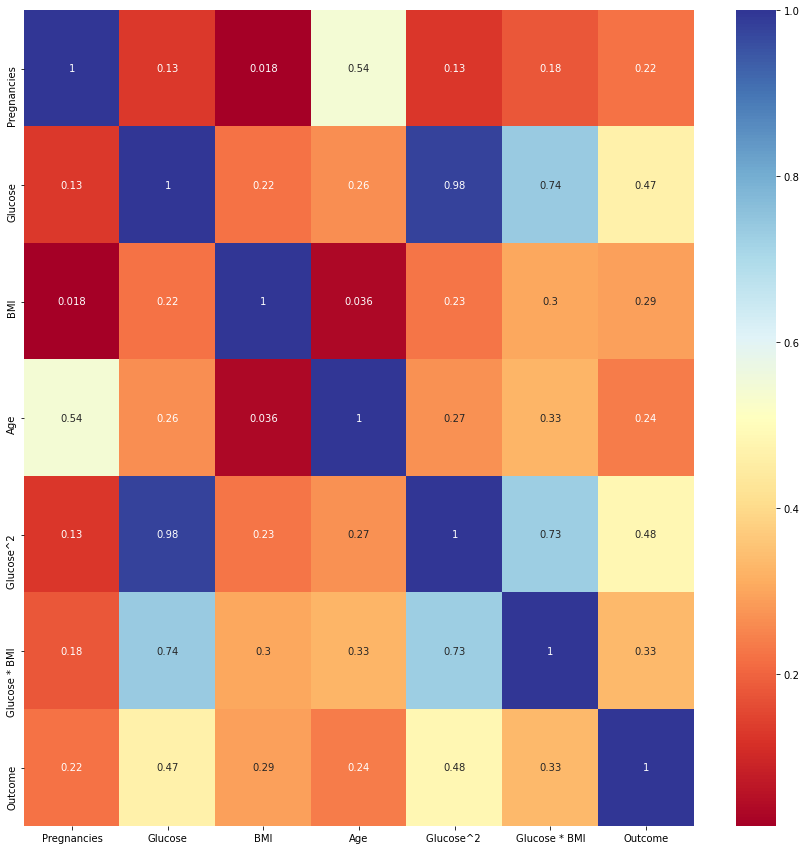

In [455]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot = True ,cmap = 'RdYlBu')
plt.show()

In [456]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))  
    
def predict(features, weights):
    z = np.dot(features, weights)
    return sigmoid(z)

def cost_function(features, labels, weights):
    observations = len(labels)

    predictions = predict(features, weights)

    class1_cost = -labels*np.log(predictions)

    class2_cost = (1-labels)*np.log(1-predictions)

    cost = class1_cost - class2_cost

    cost = cost.sum() / observations

    return cost

def update_weights(features, labels, weights, lr):
    N = len(features)

    #1 - Get Predictions
    predictions = predict(features, weights)

    gradient = np.dot(features.T,  predictions - labels)

    gradient /= N

    gradient *= lr

    weights -= gradient

    return weights
def decision_boundary(prob):
     return 1 if prob >= .5 else 0

def classify(predictions):
    decision_boundary = np.vectorize(decision_boundary)
    return decision_boundary(predictions).flatten()

In [457]:
df

,Pregnancies,Glucose,BMI,Age,Glucose^2,Glucose * BMI,Outcome
0,6,148,33.6,50,21904.0,10656.0,1
1,1,85,26.6,31,7225.0,5610.0,0
2,8,183,23.3,32,33489.0,11712.0,1
3,1,89,28.1,21,7921.0,5874.0,0
4,0,137,43.1,33,18769.0,5480.0,1
...,...,...,...,...,...,...,...
763,10,101,32.9,63,10201.0,7676.0,0
764,2,122,36.8,27,14884.0,8540.0,0
765,5,121,26.2,30,14641.0,8712.0,0
766,1,126,30.1,47,15876.0,7560.0,1


In [458]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47
